In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('demographics_train.csv')

In [3]:
data2 = pd.read_csv('election_train.csv')

In [4]:
data1.head()

,County,State,2014 Population,2010 Population,Population Percent Change,Percent Under 5 Years,Percent Under 18 Years,Percent 65 and Older,Percent Female,Percent White,...,Median Household Income,Per Capita Income,Percent Below Poverty Level,Accommodation and Food Services Sales,Manufacturers Shipments,Merchant Wholesaler Sales,Retail Sales,Retail Sales per Capita,Population per Square Mile,Land Area
0,Clinton County,IN,32776,33224,-1.3,6.9,26.3,15.8,50.5,97.8,...,48953,21554,13.9,250,22834,0,2235,6579,82.0,405.07
1,Trego County,KS,2902,3001,-3.3,4.4,18.0,24.2,50.6,97.4,...,45714,23095,6.7,40,0,241,404,13740,3.4,889.48
2,Cass County,NE,25524,25241,1.1,6.0,24.6,16.1,49.6,97.0,...,64697,29638,6.4,142,0,990,1836,7196,45.3,557.45
3,Walton County,GA,87615,83768,4.6,6.2,25.9,14.2,51.3,79.6,...,52369,22824,13.8,583,5918,2604,7971,9577,257.2,325.68
4,Norfolk County,MA,692254,670850,3.2,5.4,21.6,15.7,52.1,80.9,...,84916,44692,6.6,12940,103407,123988,112414,17133,1693.6,396.11


In [5]:
data2.head()

,County,State,Ben Carson.Number of Votes,Ben Carson.Party,Ben Carson.Percent of Votes,Bernie Sanders.Number of Votes,Bernie Sanders.Party,Bernie Sanders.Percent of Votes,Carly Fiorina.Number of Votes,Carly Fiorina.Party,...,Rick Santorum.Percent of Votes,Ted Cruz.Number of Votes,Ted Cruz.Party,Ted Cruz.Percent of Votes,No Preference.Number of Votes,No Preference.Party,No Preference.Percent of Votes,Uncommitted.Number of Votes,Uncommitted.Party,Uncommitted.Percent of Votes
0,Clinton,Indiana,0,Republican,0.0,1046,Democrat,59.1,0,Republican,...,0.0,2637,Republican,39.9,0,NaN,0.0,0,NaN,0.0
1,Cass,Nebraska,0,Republican,0.0,151,Democrat,53.4,0,Republican,...,0.0,673,Republican,22.5,0,NaN,0.0,0,NaN,0.0
2,Walton,Georgia,1046,Republican,5.5,969,Democrat,29.4,0,Republican,...,0.0,5883,Republican,30.9,0,NaN,0.0,0,NaN,0.0
3,Norfolk,Massachusetts,38,Republican,2.2,956,Democrat,55.3,0,Republican,...,0.0,153,Republican,8.8,6,NaN,0.3,0,NaN,0.0
4,Beaver,Pennsylvania,0,Republican,0.0,9563,Democrat,41.8,0,Republican,...,0.0,4331,Republican,22.3,0,NaN,0.0,0,NaN,0.0


In [6]:
State_list = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [7]:
data2['State'] = data2['State'].map(State_list)

In [8]:
county_list = list(data1['County'].unique())

In [9]:
unipue_counties = county_list.copy()

In [10]:
for county in range(len(county_list)):
    county_list[county] = county_list[county][0:-7]

In [11]:
county_dict = dict(zip(unipue_counties,county_list))

In [12]:
data1['County'] = data1['County'].map(county_dict)

In [13]:
data1.head()

,County,State,2014 Population,2010 Population,Population Percent Change,Percent Under 5 Years,Percent Under 18 Years,Percent 65 and Older,Percent Female,Percent White,...,Median Household Income,Per Capita Income,Percent Below Poverty Level,Accommodation and Food Services Sales,Manufacturers Shipments,Merchant Wholesaler Sales,Retail Sales,Retail Sales per Capita,Population per Square Mile,Land Area
0,Clinton,IN,32776,33224,-1.3,6.9,26.3,15.8,50.5,97.8,...,48953,21554,13.9,250,22834,0,2235,6579,82.0,405.07
1,Trego,KS,2902,3001,-3.3,4.4,18.0,24.2,50.6,97.4,...,45714,23095,6.7,40,0,241,404,13740,3.4,889.48
2,Cass,NE,25524,25241,1.1,6.0,24.6,16.1,49.6,97.0,...,64697,29638,6.4,142,0,990,1836,7196,45.3,557.45
3,Walton,GA,87615,83768,4.6,6.2,25.9,14.2,51.3,79.6,...,52369,22824,13.8,583,5918,2604,7971,9577,257.2,325.68
4,Norfolk,MA,692254,670850,3.2,5.4,21.6,15.7,52.1,80.9,...,84916,44692,6.6,12940,103407,123988,112414,17133,1693.6,396.11


In [14]:
data2.head()

,County,State,Ben Carson.Number of Votes,Ben Carson.Party,Ben Carson.Percent of Votes,Bernie Sanders.Number of Votes,Bernie Sanders.Party,Bernie Sanders.Percent of Votes,Carly Fiorina.Number of Votes,Carly Fiorina.Party,...,Rick Santorum.Percent of Votes,Ted Cruz.Number of Votes,Ted Cruz.Party,Ted Cruz.Percent of Votes,No Preference.Number of Votes,No Preference.Party,No Preference.Percent of Votes,Uncommitted.Number of Votes,Uncommitted.Party,Uncommitted.Percent of Votes
0,Clinton,IN,0,Republican,0.0,1046,Democrat,59.1,0,Republican,...,0.0,2637,Republican,39.9,0,NaN,0.0,0,NaN,0.0
1,Cass,NE,0,Republican,0.0,151,Democrat,53.4,0,Republican,...,0.0,673,Republican,22.5,0,NaN,0.0,0,NaN,0.0
2,Walton,GA,1046,Republican,5.5,969,Democrat,29.4,0,Republican,...,0.0,5883,Republican,30.9,0,NaN,0.0,0,NaN,0.0
3,Norfolk,MA,38,Republican,2.2,956,Democrat,55.3,0,Republican,...,0.0,153,Republican,8.8,6,NaN,0.3,0,NaN,0.0
4,Beaver,PA,0,Republican,0.0,9563,Democrat,41.8,0,Republican,...,0.0,4331,Republican,22.3,0,NaN,0.0,0,NaN,0.0


In [15]:
# Question 1: Merging dataframes
final_df = pd.merge(data2,data1,how = 'inner', on = ['County','State'])

In [16]:
final_df.head()

,County,State,Ben Carson.Number of Votes,Ben Carson.Party,Ben Carson.Percent of Votes,Bernie Sanders.Number of Votes,Bernie Sanders.Party,Bernie Sanders.Percent of Votes,Carly Fiorina.Number of Votes,Carly Fiorina.Party,...,Median Household Income,Per Capita Income,Percent Below Poverty Level,Accommodation and Food Services Sales,Manufacturers Shipments,Merchant Wholesaler Sales,Retail Sales,Retail Sales per Capita,Population per Square Mile,Land Area
0,Clinton,IN,0,Republican,0.0,1046,Democrat,59.1,0,Republican,...,48953,21554,13.9,250,22834,0,2235,6579,82.0,405.07
1,Cass,NE,0,Republican,0.0,151,Democrat,53.4,0,Republican,...,64697,29638,6.4,142,0,990,1836,7196,45.3,557.45
2,Walton,GA,1046,Republican,5.5,969,Democrat,29.4,0,Republican,...,52369,22824,13.8,583,5918,2604,7971,9577,257.2,325.68
3,Norfolk,MA,38,Republican,2.2,956,Democrat,55.3,0,Republican,...,84916,44692,6.6,12940,103407,123988,112414,17133,1693.6,396.11
4,Beaver,PA,0,Republican,0.0,9563,Democrat,41.8,0,Republican,...,49217,26258,12.2,1563,47088,11800,15552,8989,392.3,434.71


In [17]:
final_df.shape

(2114, 89)

In [18]:
# Question 2: Explore merged dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2113
Data columns (total 89 columns):
County                                                2114 non-null object
State                                                 2114 non-null object
Ben Carson.Number of Votes                            2114 non-null int64
Ben Carson.Party                                      2114 non-null object
Ben Carson.Percent of Votes                           2114 non-null float64
Bernie Sanders.Number of Votes                        2114 non-null int64
Bernie Sanders.Party                                  2114 non-null object
Bernie Sanders.Percent of Votes                       2114 non-null float64
Carly Fiorina.Number of Votes                         2114 non-null int64
Carly Fiorina.Party                                   2114 non-null object
Carly Fiorina.Percent of Votes                        2114 non-null float64
Chris Christie.Number of Votes                        2114 non-null 

In [19]:
# Dropping variables with missing/NaN values
final_df = final_df.dropna(axis = 1)

In [20]:
# Question 3: Democratic Variable
final_df['Democratic'] = final_df['Bernie Sanders.Number of Votes']+ final_df['Hillary Clinton.Number of Votes'] + final_df['Martin O\'Malley.Number of Votes']

In [21]:
# Question 4: Republic Variable
final_df['Republic'] = final_df['Ben Carson.Number of Votes']+ final_df['Carly Fiorina.Number of Votes'] + final_df['Chris Christie.Number of Votes'] + final_df['Donald Trump.Number of Votes'] + final_df['Jeb Bush.Number of Votes'] + final_df['John Kasich.Number of Votes'] + final_df['Marco Rubio.Number of Votes'] + final_df['Mike Huckabee.Number of Votes'] + final_df['Rand Paul.Number of Votes'] + final_df['Rick Santorum.Number of Votes'] + final_df['Ted Cruz.Number of Votes']

In [22]:
# Question 5
final_df['Party'] = final_df['Democratic']>final_df['Republic']
final_df['Party'] = final_df['Party'].astype('int64')

In [89]:
final_df.shape

(2114, 92)

In [24]:
final_df.to_csv('Final.csv')

In [25]:
democratic_df = final_df[final_df['Party']==1]
republic_df = final_df[final_df['Party']==0]

In [26]:
# Question 6: Mean Populations of democratic and republic counties
population_demo_2014 = democratic_df['2014 Population']
population_repub_2014 = republic_df['2014 Population']
print(population_demo_2014.mean())
print(population_repub_2014.mean())

185786.7245614035
78017.03367875647


In [27]:
# Hypotheses Test Statisctics
from scipy import stats
stats.ttest_ind_from_stats(population_demo_2014.mean(),population_demo_2014.std(),len(population_demo_2014),population_repub_2014.mean(),population_repub_2014.std(),len(population_repub_2014), equal_var= False)

Ttest_indResult(statistic=4.542770974447139, pvalue=6.625789772513302e-06)

In [28]:
# Question 7: Mean household income of democratic and republic counties
house_inc_demo = democratic_df['Median Household Income']
house_inc_repub = republic_df['Median Household Income']
print(house_inc_demo.mean())
print(house_inc_repub.mean())

45643.87192982456
45265.62176165803


In [29]:
stats.ttest_ind_from_stats(house_inc_demo.mean(),house_inc_demo.std(),len(house_inc_demo),house_inc_repub.mean(),house_inc_repub.std(),len(house_inc_repub), equal_var= False)

Ttest_indResult(statistic=0.5414236217556205, pvalue=0.5883705476929035)

In [30]:
final_df['Percent 18 to 65'] = (100-final_df['Percent Under 5 Years']-final_df['Percent Under 18 Years']-final_df['Percent 65 and Older'])

In [31]:
final_df['Total votes cast'] = final_df['Democratic'] + final_df['Republic']

In [32]:
# Question 8
import seaborn as sns

In [33]:
democratic_df = final_df[final_df['Party']==1]
republic_df = final_df[final_df['Party']==0]

In [34]:
# Party Vs Population
democratic_df['2014 Population'].mean()

185786.7245614035

In [35]:
republic_df['2014 Population'].mean()

78017.03367875647

In [36]:
# Population hypotheses test statistic
stats.ttest_ind_from_stats(democratic_df['2014 Population'].mean(),democratic_df['2014 Population'].std(),len(democratic_df['2014 Population']),republic_df['2014 Population'].mean(),republic_df['2014 Population'].std(),len(republic_df['2014 Population']), equal_var= False)

Ttest_indResult(statistic=4.542770974447139, pvalue=6.625789772513302e-06)

[Text(0,0.5,'Mean Population 2014'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Total Mean Population by County')]

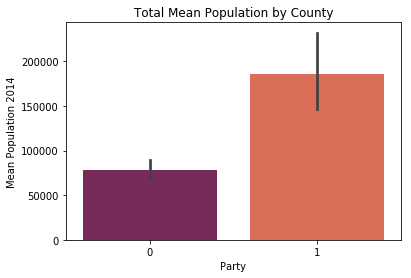

In [37]:
ax = sns.barplot(x = 'Party' , y = '2014 Population', data = final_df , palette= 'rocket')
ax.set(title = 'Total Mean Population by County', xlabel = 'Party', ylabel = 'Mean Population 2014')

[Text(0,0.5,'Total No. of Counties'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Total counties by Party')]

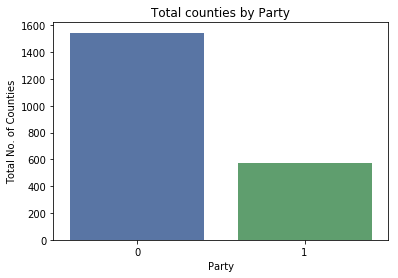

In [38]:
# Count of total counties by party
ax = sns.countplot(x = "Party" , data = final_df, palette='deep')
ax.set(title = 'Total counties by Party', xlabel = 'Party', ylabel = 'Total No. of Counties')

[Text(0,0.5,'Total votes cast'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Total votes cast in 2014 by county')]

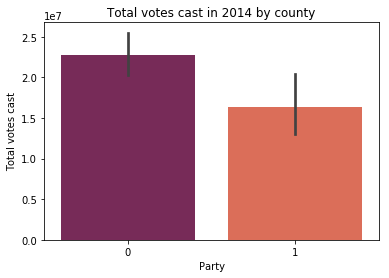

In [39]:
# Total votes cast by county
ax = sns.barplot(x = 'Party' , y = 'Total votes cast', data = final_df, estimator=sum, palette= 'rocket')
ax.set(title = 'Total votes cast in 2014 by county', xlabel = 'Party', ylabel = 'Total votes cast')

In [40]:
# Party Vs Race (Black or African American)
democratic_df['Percent Black or African American'].mean()

15.024561403508756

In [41]:
republic_df['Percent Black or African American'].mean()

7.883549222797924

[Text(0,0.5,'Percent Black/African American'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Black or African American by County')]

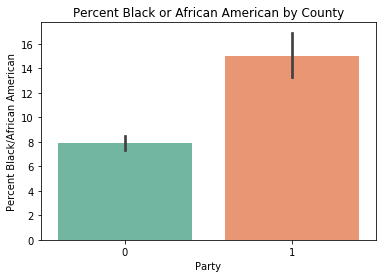

In [42]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent Black or African American'], data = final_df, palette= 'Set2')
ax.set(title = 'Percent Black or African American by County', xlabel = 'Party', ylabel = 'Percent Black/African American')

In [43]:
# White People
democratic_df['Percent White'].mean()

77.03666666666666

In [44]:
republic_df['Percent White'].mean()

87.84391191709841

[Text(0,0.5,'Percent White American'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent White American by County')]

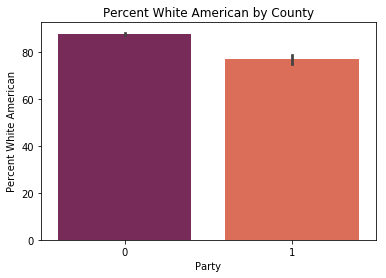

In [45]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent White'], data = final_df, palette='rocket')
ax.set(title = 'Percent White American by County', xlabel = 'Party', ylabel = 'Percent White American')

In [46]:
# Asian People
democratic_df['Percent Asian'].mean()

2.4154385964912266

In [47]:
republic_df['Percent Asian'].mean()

1.0616580310880825

[Text(0,0.5,'Percent Asian'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Asian by County')]

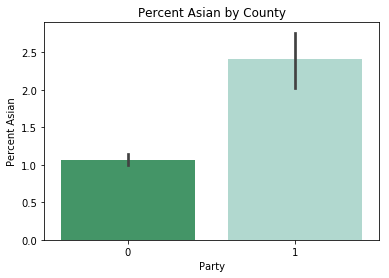

In [48]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent Asian'], data = final_df, palette='BuGn_r')
ax.set(title = 'Percent Asian by County', xlabel = 'Party', ylabel = 'Percent Asian')

In [49]:
# American Indian/Alaskan Natives
democratic_df['Percent American Indian and Alaska Native'].mean()

3.0724561403508766

In [50]:
republic_df['Percent American Indian and Alaska Native'].mean()

1.4015544041450811

[Text(0,0.5,'Percent American Indian'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent American Indian by County')]

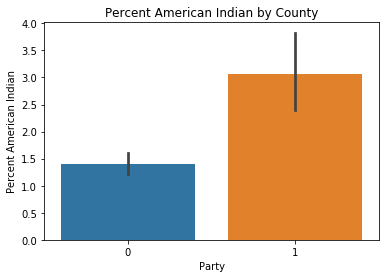

In [51]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent American Indian and Alaska Native'], data = final_df)
ax.set(title = 'Percent American Indian by County', xlabel = 'Party', ylabel = 'Percent American Indian')

In [52]:
# Hispanic or Latino
democratic_df['Percent Hispanic or Latino'].mean()

13.06491228070176

In [53]:
republic_df['Percent Hispanic or Latino'].mean()

8.145012953367885

[Text(0,0.5,'Percent Hispanic/Latino American'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Hispanic or Latino by County')]

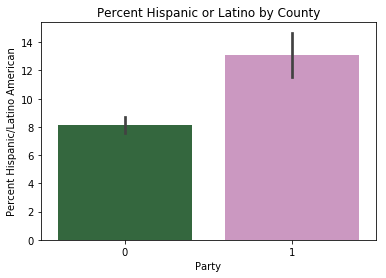

In [54]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent Hispanic or Latino'], data = final_df, palette="cubehelix")
ax.set(title = 'Percent Hispanic or Latino by County', xlabel = 'Party', ylabel = 'Percent Hispanic/Latino American')

In [55]:
# Native Hawaiian and Other Pacific Islander
democratic_df['Percent Native Hawaiian and Other Pacific Islander'].mean()

0.1735087719298244

In [56]:
republic_df['Percent Native Hawaiian and Other Pacific Islander'].mean()

0.0902849740932634

[Text(0,0.5,'Total Native Hawaiian'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Total Native Hawaiian by County')]

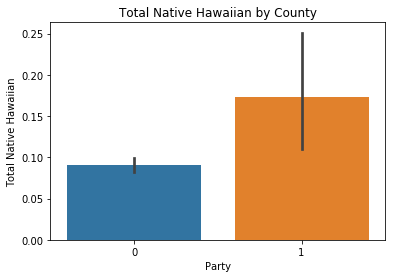

In [57]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent Native Hawaiian and Other Pacific Islander'], data = final_df)
ax.set(title = 'Total Native Hawaiian by County', xlabel = 'Party', ylabel = 'Total Native Hawaiian')

In [58]:
# Two or more Races
democratic_df['Percent Two or More Races'].mean()

2.2743859649122804

In [59]:
republic_df['Percent Two or More Races'].mean()

1.7108160621761679

[Text(0,0.5,'Percent Two or more races'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Two or More Races by County')]

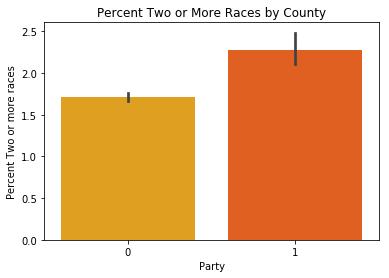

In [60]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent Two or More Races'], data = final_df, palette='autumn_r')
ax.set(title = 'Percent Two or More Races by County', xlabel = 'Party', ylabel = 'Percent Two or more races')

In [61]:
# White Americans
democratic_df['Percent White, not Hispanic or Latino'].mean()

65.44122807017537

In [62]:
republic_df['Percent White, not Hispanic or Latino'].mean()

80.5704663212436

[Text(0,0.5,'Percent White/Non-Hispanic'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent White, not Hispanic or Latino by County')]

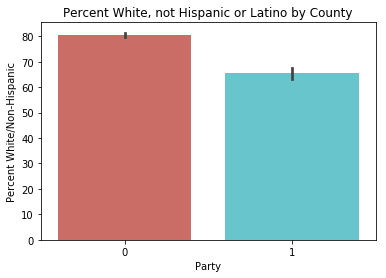

In [63]:
ax = sns.barplot(x = 'Party' , y = final_df['Percent White, not Hispanic or Latino'], data = final_df, palette='hls')
ax.set(title = 'Percent White, not Hispanic or Latino by County', xlabel = 'Party', ylabel = 'Percent White/Non-Hispanic')

In [64]:
# Party Vs Sex
# Females
democratic_df['Percent Female'].mean()

49.959824561403465

In [65]:
republic_df['Percent Female'].mean()

49.94313471502579

[Text(0,0.5,'Percent Female'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Female by County')]

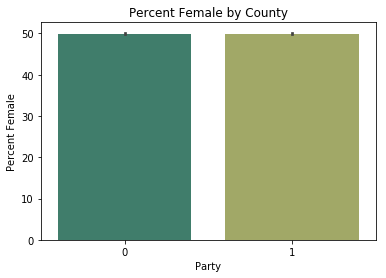

In [66]:
ax = sns.barplot(x = 'Party', y = final_df['Percent Female'], data = final_df, palette='gist_earth')
ax.set(title = 'Percent Female by County',xlabel= 'Party', ylabel= 'Percent Female')

[Text(0,0.5,'Percent Male'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Male by County')]

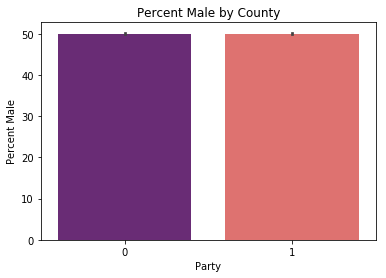

In [67]:
ax = sns.barplot(x = 'Party', y = (100-final_df['Percent Female']), data = final_df, palette='magma')
ax.set(title = 'Percent Male by County',xlabel= 'Party', ylabel= 'Percent Male')

In [68]:
# Party Vs Age
# 65 and older
democratic_df['Percent 65 and Older'].mean()

16.22350877192984

In [69]:
republic_df['Percent 65 and Older'].mean()

18.006800518134728

[Text(0,0.5,'Percent aged 65 and older'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Aged 65 and older by County')]

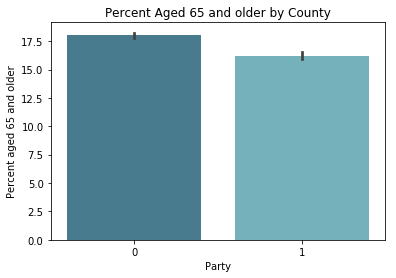

In [70]:
ax = sns.barplot(x = 'Party', y = final_df['Percent 65 and Older'], data = final_df, palette='GnBu_d')
ax.set(title = 'Percent Aged 65 and older by County',xlabel= 'Party', ylabel= 'Percent aged 65 and older')

In [71]:
# 18 to 65
democratic_df['Percent 18 to 65'].mean()

55.594736842105235

In [72]:
republic_df['Percent 18 to 65'].mean()

53.611269430051856

[Text(0,0.5,'Percent aged 18-65'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent Aged 18-65 by County')]

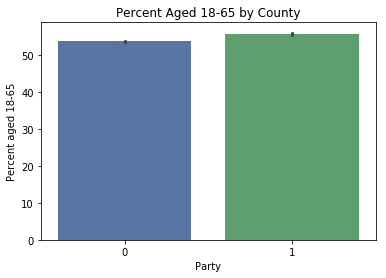

In [73]:
ax = sns.barplot(x = 'Party', y = final_df['Percent 18 to 65'], data = final_df, palette='deep')
ax.set(title = 'Percent Aged 18-65 by County',xlabel= 'Party', ylabel= 'Percent aged 18-65')

In [74]:
# Party Vs Education
# High School Degree
democratic_df['High School'] = (democratic_df['Percent High School or Higher']-democratic_df['Percent Bachelor\'s Degree or Higher'])
democratic_df['High School'].mean()

60.70807017543864

In [75]:
republic_df['High School'] = (republic_df['Percent High School or Higher']-republic_df['Percent Bachelor\'s Degree or Higher'])
republic_df['High School'].mean()

65.83944300518142

[Text(0,0.5,'Percent with high school degree'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent with High School degree by County')]

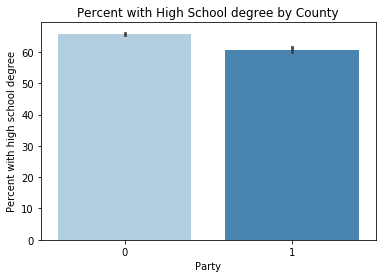

In [76]:
ax = sns.barplot(x = 'Party', y = (final_df['Percent High School or Higher']-final_df['Percent Bachelor\'s Degree or Higher']), data = final_df, palette='Blues')
ax.set(title = 'Percent with High School degree by County',xlabel= 'Party', ylabel= 'Percent with high school degree')

In [77]:
# Bachelors and Higher Degree
democratic_df['Percent Bachelor\'s Degree or Higher'].mean()

22.489473684210534

In [78]:
republic_df['Percent Bachelor\'s Degree or Higher'].mean()

18.569624352331598

[Text(0,0.5,'Percent with Bachelors and higher degree'),
 Text(0.5,0,'Party'),
 Text(0.5,1,'Percent with bachelors and higher degree')]

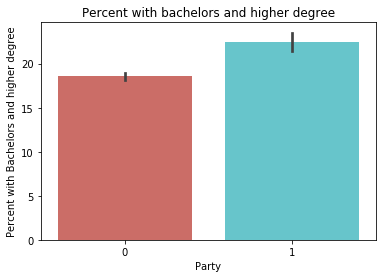

In [79]:
ax = sns.barplot(x = 'Party', y = final_df['Percent Bachelor\'s Degree or Higher'], data = final_df, palette='hls')
ax.set(title = 'Percent with bachelors and higher degree',xlabel= 'Party', ylabel= 'Percent with Bachelors and higher degree')

In [80]:
# Question 10:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='adarshjv20', api_key='VhR37dcVwvfCYHbv3qO0')

In [81]:
fips_data = pd.read_excel('Fips.xlsx')
cols = fips_data.iloc[0,:]
cols[1] = 'County'
fips_data.columns = cols
fips_data = fips_data.drop(0)

In [82]:
fips_data['FIPS'] = fips_data['FIPS State'] + fips_data['FIPS County']
fips_data['State'] = fips_data['State'].map(State_list)

In [83]:
fips_data.head()

,State,County,FIPS State,FIPS County,FIPS
1,AL,Autauga,01,001,01001
2,AL,Baldwin,01,003,01003
3,AL,Barbour,01,005,01005
4,AL,Bibb,01,007,01007
5,AL,Blount,01,009,01009


In [84]:
final = pd.merge(final_df,fips_data,on=['State','County'])

In [86]:
# Plot Counties
fips = final['FIPS'].tolist()
values = final['Party'].tolist()
colorscale = ["#ffa500","#0b4083"]
fig = ff.create_choropleth(fips=fips, values=values, colorscale=colorscale,legend_title='County',title='Democratic and Republic Counties')
py.iplot(fig, filename='choropleth of some cali counties - full usa scope')


The draw time for this plot will be slow for clients without much RAM.
